# **GROUP 8 - Solutions to P02**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics
- Rutul Kumar, <s23rkuma@uni-bonn.de>, M.Sc Astrophysics

**Deadline:** 31. Oct 2024, 13:00 
_______________________________________________________


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math

# P03: Point Processes

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.


In [10]:
#Paramters
mu = 0
sigma = 1.0
n_samp = 10
n_reps = 10

# Simulating 10 repetitions of drawing 10 samples
samples = np.random.normal(mu, sigma, (n_reps, n_samp))

samples

array([[-1.31810572e+00, -3.63430885e-01, -1.65944540e+00,
         1.44150136e+00, -3.00220735e-01, -9.25370744e-01,
        -3.79700600e-01, -7.70800446e-01,  6.84322891e-01,
         1.48603897e-01],
       [-6.66828431e-02, -1.22632289e+00, -1.66692526e-01,
         1.19438604e+00,  9.50539053e-02,  1.25240087e+00,
         9.94676843e-01,  1.52016458e+00,  6.76790738e-01,
        -1.96000696e-01],
       [ 3.16765465e-01, -7.48218629e-01,  1.02785014e+00,
         5.98078494e-01, -3.95539249e-01,  5.95512007e-02,
         1.49606776e-01, -1.51644153e-01, -4.41709016e-01,
         9.26220326e-02],
       [ 6.06134746e-01,  8.69769189e-01,  2.75526960e-01,
        -8.72063995e-01,  5.09963185e-01,  9.36267579e-01,
        -1.17347836e+00, -4.72681303e-04,  4.80648814e-02,
        -1.82011344e+00],
       [-8.94053178e-01,  7.79061830e-01,  1.19884740e+00,
        -1.12624170e+00,  9.24790201e-01,  3.43756435e-01,
         4.95333701e-01,  6.77939474e-01, -3.76808156e-02,
        -4.

(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [7]:
# Calculating the mean and the variance
sample_means = np.mean(samples, axis=1)
variances_biased = np.var(samples, axis=1) # biased variance
variance_unbiased = np.var(samples, axis=1, ddof=1) # unbiased variance

sample_means

array([ 0.00194477, -0.38152679,  0.22910277, -0.25392831,  0.16182735,
       -0.08823023,  0.52892586, -0.34645837,  0.22556631,  0.17361332])

## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.

(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?



In [11]:
def simulate_samples(n_reps, n_samp):
    # Parameters
    mu = 0
    sigma = 1.0
    
    # Simulating samples
    samples = np.random.normal(mu, sigma, (n_reps, n_samp))
    
    # Calculating means and variances
    sample_means = np.mean(samples, axis=1)
    variances_biased = np.var(samples, axis=1)  # Biased variance
    variances_unbiased = np.var(samples, axis=1, ddof=1)  # Unbiased variance
    
    return sample_means, variances_biased, variances_unbiased

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

In [41]:
def analyze_distribution_and_bias(n_reps, n_samp_list):
    for n_samp in n_samp_list:
        sample_means, variances_biased, variances_unbiased = simulate_samples(n_reps, n_samp)
        
        # (i) Investigate the distribution of the sample mean
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(sample_means, bins=50, density=True, alpha=0.9, color='darkcyan')
        plt.title(f'Distribution of Sample Mean (n_samp={n_samp})')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')
        
        # Overlaying the expected normal distribution
        x = np.linspace(-4, 4, 100)
        plt.plot(x, (1/(np.sqrt(2 * np.pi))) * np.exp(-x**2 / 2), color='red', lw=2)
        
        # (ii) Investigate bias of variance estimators
        plt.subplot(1, 2, 2)
        plt.hist(variances_biased, bins=50, alpha=1, color='blue', label='Biased Variance')
        plt.hist(variances_unbiased, bins=50, alpha=1, color='darkorange', label='Unbiased Variance')
        plt.title(f'Variance Estimators (n_samp={n_samp})')
        plt.xlabel('Variance Value')
        plt.ylabel('Frequency')
        plt.axvline(x=sigma**2, color='k', linestyle='dashed', linewidth=2)  # True variance line
        plt.legend()
        
        plt.tight_layout()
        plt.show()


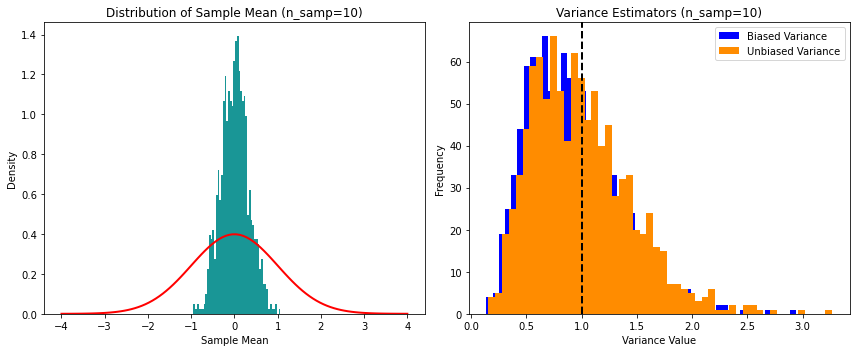

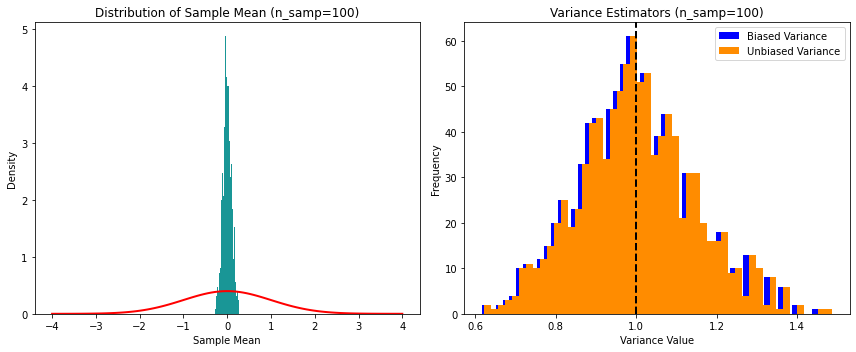

In [42]:
# Running the analysis for different sample sizes (1000 experiments), with 10 and 100 samples
analyze_distribution_and_bias(1000, [10, 100])

## Problem 3: Analyzing samples

Load `sample1.out` from the `data` directory into your notebook. Inspect the distribution of the sample by plotting a histogram. 

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

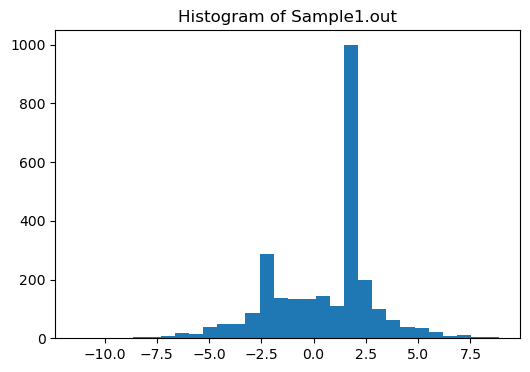

(2700, -11.347045537649175, 8.870113734191595)

In [2]:
# Load sample1.out from data directory. 
# Plot a histogram to check its distribution.
sample1 = np.loadtxt('data/sample1.out')

plt.figure(figsize=(6,4))
plt.hist(sample1, bins = 30)
plt.title('Histogram of Sample1.out')
plt.show()
# check sample size, min value and max value
sample1.size, np.min(sample1), np.max(sample1)

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

Mean estimator is given by $$ \hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i $$

To offer choices of variance estimator in an argument, we propose two variance estimator as follows 
$$ choice \ 1: \hat{\sigma_1^2} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu})^2 $$
$$ choice \ 2: \hat{\sigma_2^2} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \hat{\mu})^2 $$
We set choice 1 and choice 2 correspond to input keyword "variance_1" and "variance_2" in the Class analysis.

For error on the mean, we calculate it by taking the square root of the mean square error (MSE) of the mean estimator.
Since $\langle \hat{\mu} \rangle = \langle \frac{1}{n}\sum_{i=1}^n x_i \rangle = \mu$, then $\hat{\mu}$ is an unbiased estimator. Thus MSE($\hat{\mu}$) = var($\hat{\mu}$) = $\frac{\sigma^2}{n}$ and error on the mean = $\sqrt{\frac{\sigma^2}{n}}$.

For bias of the variance:

choice 1: $\langle \hat{\sigma_1^2} \rangle  = \langle \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu})^2 \rangle = \frac{n-1}{n} \sigma^2$, $\hat{\sigma_1^2}$ is biased, and its bias is $\langle \hat{\sigma_1^2} \rangle - \sigma^2 = -\frac{1}{n}\sigma^2$.

choice 2: $\langle \hat{\sigma_2^2} \rangle  = \langle \frac{1}{n-1}\sum_{i=1}^n (x_i - \hat{\mu})^2 \rangle = \sigma^2$, $\hat{\sigma_1^2}$ is unbiased, and its bias is $\langle \hat{\sigma_2^2} \rangle - \sigma^2 = 0$.

In [3]:
class Sample_analysis:
    
    def __init__(self, sample, var_est_choice):
        self.variance_est = var_est_choice
        self.sample = sample
        self.size = sample.size
        
        # calculate mean estimator
        self.mean_est = np.nansum(self.sample) / self.size
        
        # calculate the mean-square-error of mean estimator    
        self.mean_error = np.sqrt((np.nansum((self.sample-np.nanmean(self.sample))**2) / self.size) / self.size)
        
        # calculate variance estimator and bias of variance
        if self.variance_est == 'variance_1':
            self.variance_est = np.nansum((self.sample-np.nanmean(self.sample))**2) / self.size
            self.variance_bias = (-1) / self.size * self.variance_est
        if self.variance_est == 'variance_2':
            self.variance_est = np.nansum((self.sample-np.nanmean(self.sample))**2) / (self.size-1)
            self.variance_bias = 0 


(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.

mean estimation: 0.6061677979776571
variance estimation: 6.484724745036359
mean error: 0.048998575168743015
variance bias: 0
median estimation: 1.857948895866691


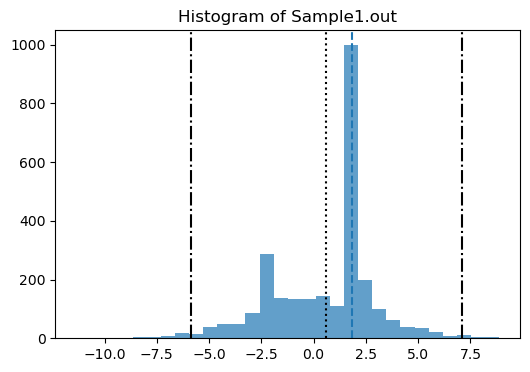

In [4]:
sp1_analysis = Sample_analysis(sample1, 'variance_2')
print('mean estimation:', sp1_analysis.mean_est)
print('variance estimation:', sp1_analysis.variance_est)
print('mean error:', sp1_analysis.mean_error)
print('variance bias:', sp1_analysis.variance_bias)
print('median estimation:', np.nanmedian(sample1))

plt.figure(figsize=(6,4))
plt.hist(sample1, bins = 30, alpha=0.7)
plt.axvline(x=np.nanmedian(sample1), linestyle='--')
plt.axvline(x=sp1_analysis.mean_est, linestyle='dotted', color='k')
plt.axvline(x=sp1_analysis.mean_est-sp1_analysis.variance_est, linestyle='-.', color='k')
plt.axvline(x=sp1_analysis.mean_est+sp1_analysis.variance_est, linestyle='-.', color='k')
plt.title('Histogram of Sample1.out')
plt.show()

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

In [5]:
# read all sample.out files
sample_list = ['sample1', 'sample2', 'sample3', 'sample4', 'sample5', 'sample6', 'sample7', 'sample8', 'sample9', 'sample10']
for i in np.arange(10):
    sample_list[i] = np.loadtxt('data/sample'+str(i+1)+'.out')

mean estimation: 0.6061677979776571
variance estimation: 6.484724745036359
mean error: 0.048998575168743015
variance bias: 0
median estimation: 1.857948895866691


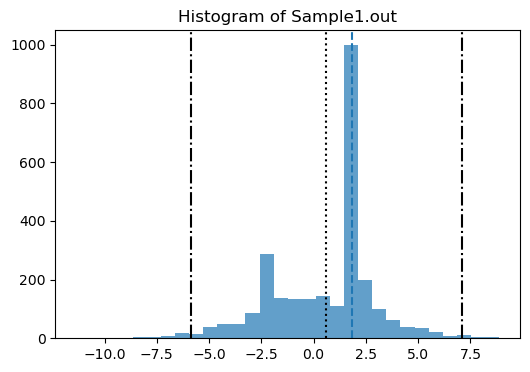

mean estimation: 0.5719037347793242
variance estimation: 6.588252094222201
mean error: 0.049388152728624256
variance bias: 0
median estimation: 1.8331658333299679


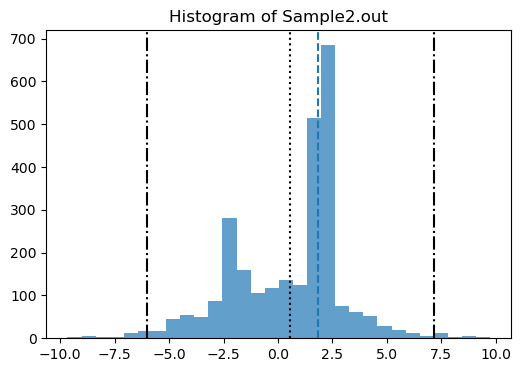

mean estimation: 0.6312236091775314
variance estimation: 6.643041776984326
mean error: 0.04959309013674668
variance bias: 0
median estimation: 1.8556642713905707


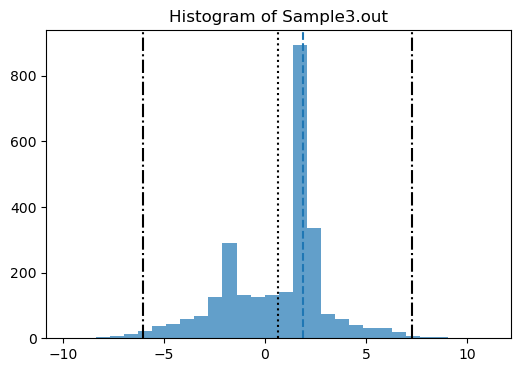

mean estimation: 0.5861949487116259
variance estimation: 6.740049765419785
mean error: 0.04995388039905317
variance bias: 0
median estimation: 1.8529404503417068


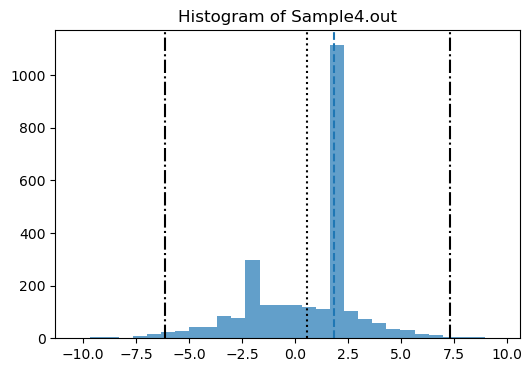

mean estimation: 0.6085423919974559
variance estimation: 6.289245761656941
mean error: 0.048254404563401895
variance bias: 0
median estimation: 1.8372180393319466


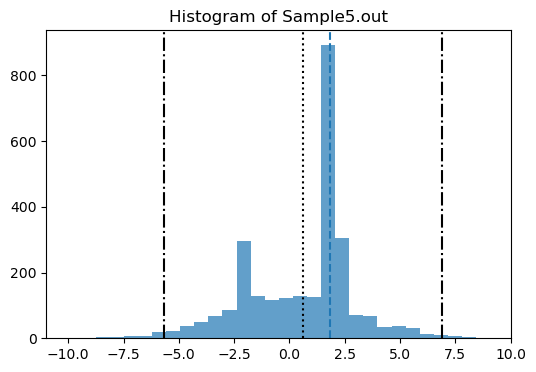

mean estimation: 0.5910772920359088
variance estimation: 6.626735185591468
mean error: 0.049532184969589645
variance bias: 0
median estimation: 1.8405734495109183


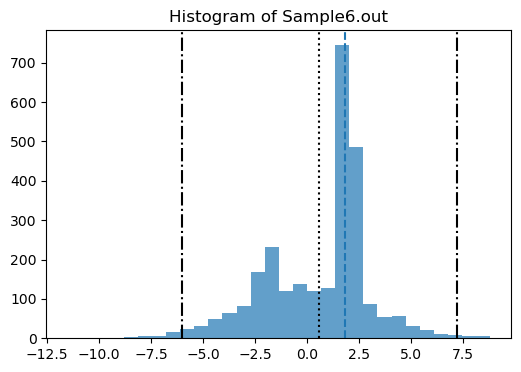

mean estimation: 0.5340742944160791
variance estimation: 6.312873923517281
mean error: 0.048344963436260664
variance bias: 0
median estimation: 1.8268981183068542


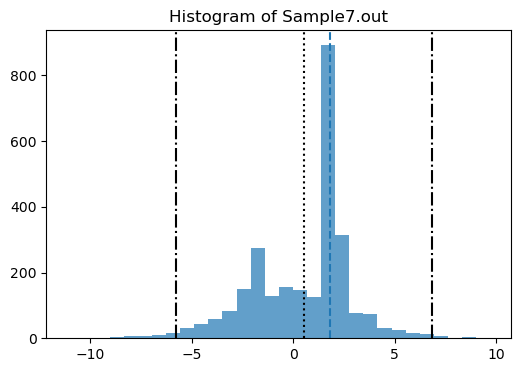

mean estimation: 0.5909215358225047
variance estimation: 6.481369428568534
mean error: 0.04898589714424909
variance bias: 0
median estimation: 1.832196571413769


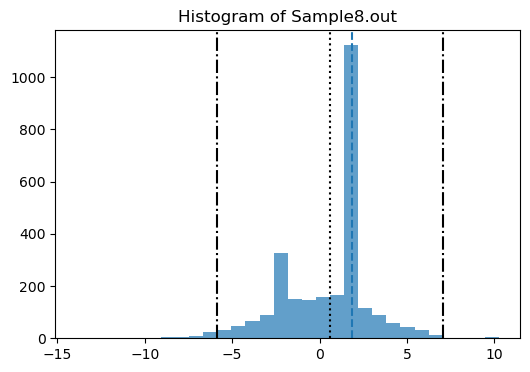

mean estimation: 0.5769559388238201
variance estimation: 6.07229471190879
mean error: 0.04741481919410984
variance bias: 0
median estimation: 1.8225414590353608


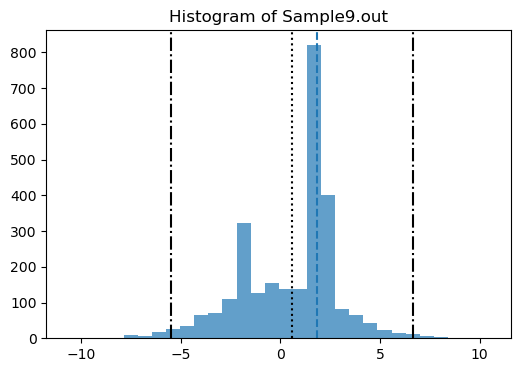

mean estimation: 0.6168418321453177
variance estimation: 6.263252811165293
mean error: 0.048154585520283864
variance bias: 0
median estimation: 1.8268110424969057


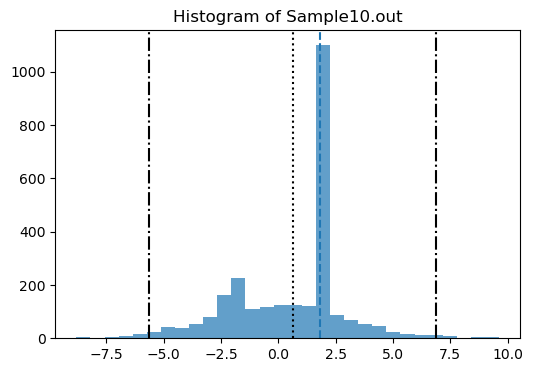

In [6]:
for i in np.arange(0, 10, 1):
    sp_analysis = Sample_analysis(sample_list[i], 'variance_2')
    print('mean estimation:', sp_analysis.mean_est)
    print('variance estimation:', sp_analysis.variance_est)
    print('mean error:', sp_analysis.mean_error)
    print('variance bias:', sp_analysis.variance_bias)
    print('median estimation:', np.nanmedian(sample_list[i]))

    plt.figure(figsize=(6,4))
    plt.hist(sample_list[i], bins = 30, alpha=0.7)
    plt.axvline(x=np.nanmedian(sample_list[i]), linestyle='--')
    plt.axvline(x=sp_analysis.mean_est, linestyle='dotted', color='k')
    plt.axvline(x=sp_analysis.mean_est-sp_analysis.variance_est, linestyle='-.', color='k')
    plt.axvline(x=sp_analysis.mean_est+sp_analysis.variance_est, linestyle='-.', color='k')
    plt.title('Histogram of Sample'+str(i+1)+'.out')
    plt.show()

Yes, samples seem to be consistent with being drawn from the same underlying distributions from their distribution shapes.

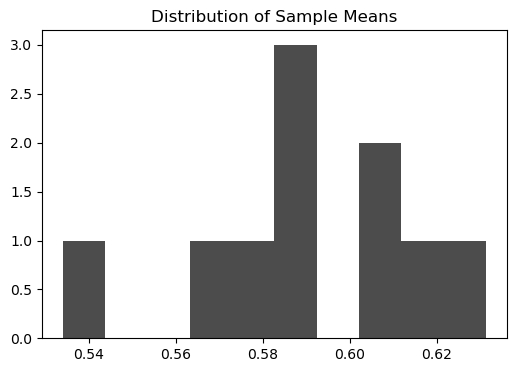

0.5340742944160791 0.6312236091775314 0.025782848187392085


In [7]:
# Distribution of sample means
sample_means = np.zeros(10)
for i in np.arange(10):
    sample_means[i] = Sample_analysis(sample_list[i], 'variance_1').mean_est
    
plt.figure(figsize=(6,4))
plt.hist(sample_means, alpha=0.7, bins=10, color='k')
plt.title('Distribution of Sample Means')
plt.show()

print(np.min(sample_means), np.max(sample_means), np.std(sample_means))

The sample means of the 10 samples range from 0.53 to 0.63 with standard deviation of ~0.03. Take the value range of sample 1 as a reference, it ranges from -11.35 to 8.87, thus the deviation of sample means are relatively small compared to the value range of sample itself. This is consistent if these samples are drawn from the same underlying distribution. If we conduct more experiments to draw more sample sets from the distribution, the distribution of sample means is expected to be more like Gaussian distribution.

## Problem 4: The Poisson distribution

Let us assume we have a process in which the probability of a given event, $p$, is small but we perform a large number of trials $N$. We further assume that the so-called rate of this process (or mean number of ocurring events), $\lambda=Np$, is finite and constant. Then the probability of $k$ events occurring follows a Poisson distribution given by $$P(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}.$$ So the Poisson distribution describes the distributions of events, where each single one is rare but we perform a large number of trials in order to keep $\lambda$ constant. An example for this is the number of photons reaching a telescope.

One of the earliest application of Poisson processes was the probability of Prussian soldiers being kicked to death by horses. This problem was analyzed by Ladislaus Bortkiewicz in 1898. Analyzing 10 Prussian corps for 20 years he collected the following data:

| Number of deaths | Number of groups |
|:---| :--- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

(i) Plot the probability distribution of these data.

(ii) Compare to the theoretical prediction using Poisson statistics.

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
events=[109,65,22,3,1]
def number_of_deaths(function):
    deaths = [] 
    for a, x in enumerate(function): 
        deaths.extend([a] * x)  
    return deaths

In [14]:
data=number_of_deaths(events)

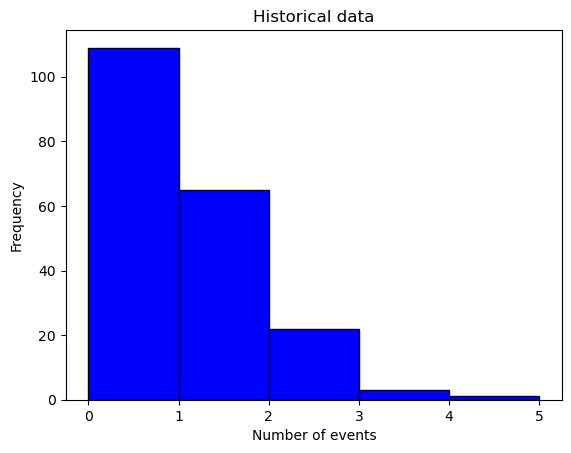

In [145]:
plt.hist(data, bins=range(max(data) + 2), color='b', edgecolor='black')
plt.title('Historical data')
plt.xlabel('Number of events')
plt.ylabel('Frequency')
plt.show()

Now for Poisson statistics:
$$\lambda=\frac{\sum_n(n*k)}{\sum_n n}$$

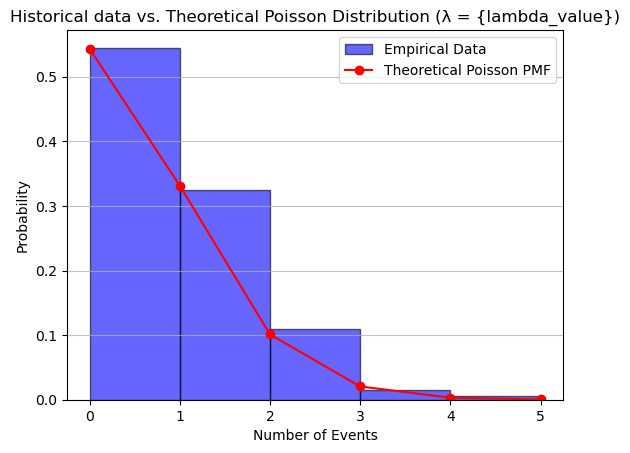

In [143]:
Lambda=(0*109+1*65+2*22+3*3+4*1)/(109+65+22+3+1)
poisson_samp=np.random.poisson(Lambda,200)
x = range(max(data) + 2)
pmf=poisson.pmf(x,Lambda)


plt.hist(data, bins=x, density=True, alpha=0.6, color='b', edgecolor='black', label='Empirical Data')


plt.plot(x, pmf, marker='o', linestyle='-', color='red', label='Theoretical Poisson PMF')

plt.title('Historical data vs. Theoretical Poisson Distribution (λ = {lambda_value})')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

As we can see from plot above, historical data follows theoretical Poisson distribution.